# Reinforcement Learning

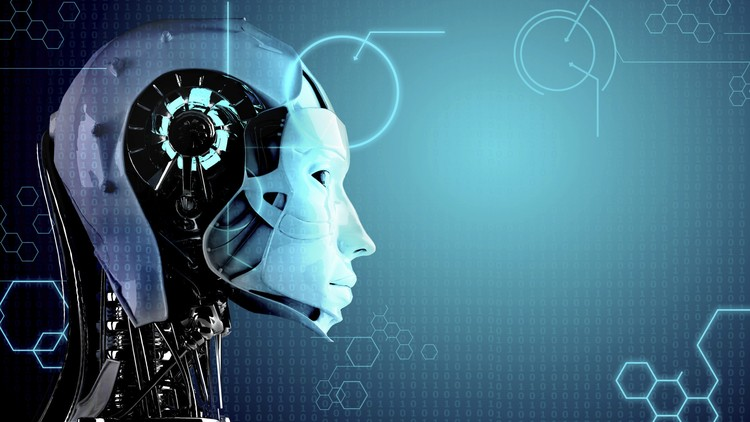

One of the biggest challenges with the Deep Learning algorithms is the need of a huge amount of data in order to achieve a good performance. With the rise of Reinforcement Learning this limitation can be overcome in some way. But the idea of the RL is not new; in fact it was proposed first time in 1980s by Rich Sutton and Andrew Barto, but is till know that the technology has allowed its implementation. This guide will develop first a brief introduction of the definition and key concepts behind RL, then the types of RL algorithms will be mentioned, continuing with an introduction to the use the the Gym framework for Python in a simple example of RL and finally a breif presentation of success use cases.

## Origins of Reinforcement Learning

In order to understand the Reinforcement Lerning concept, is important to mention the roots of this idea. To do that we have to review the Behavioral Psychology theory, that comes from the psicology field. This theory states that the bahavior of humans and animals is consequence of the experience in certain environment. Let's present a very simple example of this reward-driven behavior idea.

Imagine that you are training your dog to do some trick. You have to show your dog what you pretend it to do, and the dog will act if some vary ways. If your dog do the trick tha you want, you will reward it with its favorite food. With this action we are incetivating, via a positive reinforcement, the performace of that trick. If you respond negatively to some behavior of the dog that does not lead to the trick, the dog probably will try to avoid it a next time.

![]()
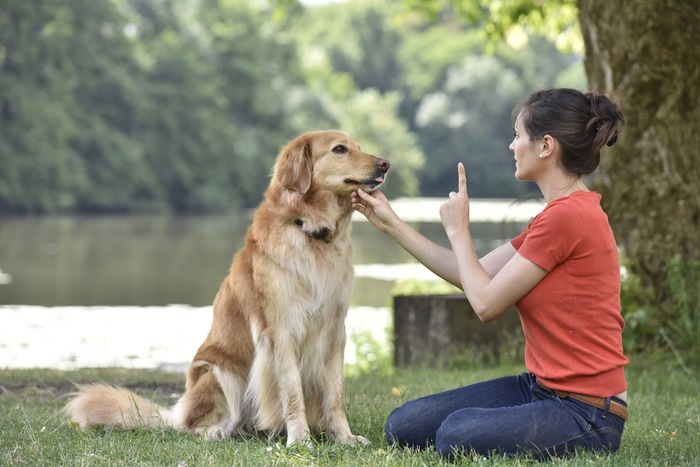

## Definition of Reinforcement Learning

The basic idea of Reinforcement learging is adquire knowlege through interactions with a environment. We will have a RL agent that is interacting with its environment, till see some consequencies of its actions, the agent will adjust its behaviors if response of the reward received. This agent is handled by a machine learning algorithm and its objective is learn a policy that maximize the expected reward from the environment.

### Markov Desition Process

RL is modeled using the Markov Desition Process (MDP):
* A group of **States**, with its corresponding distribution **p(S)**.
* A group of **actions**.
* Transitions dynamics.
* An immediate reward function.
* A discount factor.

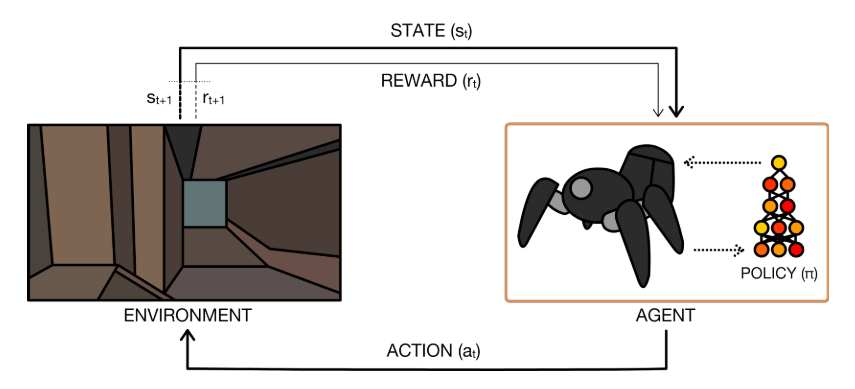

Now, let's describe the key concepts in RL:

* **Environment:** This is the place where the agent is and interact with.
* **State:** Here is the description of the environment is some instant or period of time.
* **Action:** This depends of the environment where the agent is.
* **Reward:** It depends of the current state, the action performed and the next state. This component plays a very important role in the RL model, because it has to be tracked in orden to optimize the algorithm.
* **Policies:** Set of rules used by the agents that defines the action to be taken.

Going back to the dog training example, we can say that the dog is the agent, your house or the place where you are training it is the environment; the desciption of the place of the situacions in it, is the state; and then the dog will receive positive or negative rewards that will help it to learn the trick.

## Types of Reinforcement Learning algorithms

Exist two types of RL approaches: the policy search, value function and a hybrid called actor-critic.

* **Value function:** In this approach the algorithm tries to estimate the expected return in given some state.
* **Search policy:** In this case, the algorithm search for an optimal policiy directly, which becomes the case of a stochastic optimization.
* **Actor-critic:** In this case the actor (policy) learns by using feedback from the critic (value function).

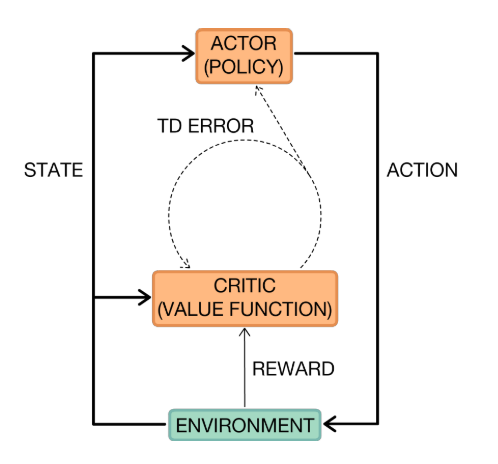


## Example of Reinforcement Learning using OpenAI gym

To do a little demostration of the use of RL, we will make use of the [OpenAI gym](https://gym.openai.com/) tool for Python. So let's talk about this framework first. This is a toolkit that helps use in the implementation and verification of reinforcement learning algorithms

To install it, you can use the Python Install Packages (**pip**), running the following command:

```console
pip install gym
```
Now let's run a very simple example using the **Sapce Invaders** Atari game as the environment and using the brute force as an estrategy for the action selection.

> Maximize your score in the Atari 2600 game SpaceInvaders. In this environment, the observation is an RGB image of the screen, which is an array of shape (210, 160, 3) Each action is repeatedly performed for a duration of kk frames, where kk is uniformly sampled from \{2, 3, 4\}{2,3,4} (Source: https://gym.openai.com/envs/SpaceInvaders-v0/)

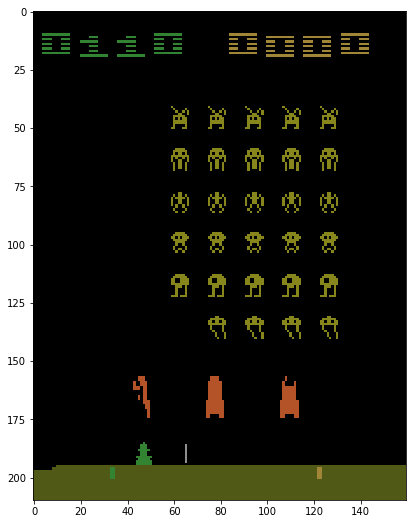

In [7]:
import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('SpaceInvaders-v0')
env.reset()
plt.figure(figsize=(9,9))
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
for _ in range(500):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)
env.close()

### Q-Learning algorithm

This is a simple and one of the most used algorithms in RL. The goal is to learn over the environment rewards. Here we will have a Q-Table with a map of the combination (state, action). This time the environment is the Frozen Lake.

> The agent controls the movement of a character in a grid world. Some tiles of the grid are walkable, and others lead to the agent falling into the water. Additionally, the movement direction of the agent is uncertain and only partially depends on the chosen direction. The agent is rewarded for finding a walkable path to a goal tile.
(Source: https://gym.openai.com/envs/FrozenLake8x8-v0/)

The following is the description of the surface:
* S: starting point, safe.
* F: frozen surface, safe.
* H: hole, fall to your doom.
* G: goal.

In [8]:
import gym
import numpy as np
from IPython import display

# 1. Load Environment and Q-table structure
env = gym.make('FrozenLake8x8-v0')
Q = np.zeros([env.observation_space.n, env.action_space.n])

# env.obeservation.n, env.action_space.n gives number of states and action in env loaded
# 2. Parameters of Q-leanring
eta = .628
gma = .9
epis = 1000
rev_list = [] # rewards per episode calculate

# 3. Q-learning Algorithm
for i in range(epis):
    # Reset environment
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    
    #The Q-Table learning algorithm
    while j < 99:
        env.render()
        display.clear_output(wait=True)
        j+=1
        
        # Choose action from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        
        #Get new state & reward from environment
        s1,r,d,_ = env.step(a)
        
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + eta*(r + gma*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    rev_list.append(rAll)
    env.render()
    display.clear_output(wait=True)
    
print ("Reward Sum on all episodes " + str(sum(rev_list)/epis))
print ("Final Values Q-Table")
print (Q)

  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(Source: https://towardsdatascience.com/reinforcement-learning-with-openai-d445c2c687d2)

## Use cases

Maybe the most famous one the the case of Alpha Go project, that was develop by Google, and defeated the human World Champion of the Go game. In this case the implementation of RL was complemented with Deep Learning techniques.

## References

- [1] Arulkumaran, K., Deisenroth, M. P., Brundage, M., & Bharath, A. A. (2017). Deep reinforcement learning: A brief survey. IEEE Signal Processing Magazine. https://doi.org/10.1109/MSP.2017.2743240
- [2] https://gym.openai.com/
- [3] https://towardsdatascience.com/reinforcement-learning-with-openai-d445c2c687d2